In [51]:
import tensorflow as tf  # import libraries
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, losses, datasets, Model

#check tensorflow version
print(tf.__version__)

2.9.2


In [52]:
from keras.datasets import mnist #import data
(X_train_full, y_train_full),(X_test, y_test) = mnist.load_data() #load data

In [53]:
#class_names = ["T-shirt/top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneakers", "bag", "ankle boot"] #define class names
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"] #define class names

In [54]:
print(X_train_full.shape) #explore data, check shape 
print(y_train_full.shape)

print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [55]:
X_train_full.dtype #explore data, check data type
y_train_full.dtype

dtype('uint8')

In [56]:
#X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0 #preprocession, normalisation, recale the pixel values from 0-255 to the range of 0-1 
#y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
#X_test = X_test / 255.0



In [57]:

X_train = tf.pad(X_train_full,[[0,0],[2,2],[2,2]])/255
X_test = tf.pad(X_test,[[0,0],[2,2],[2,2]])/255

y_train = y_train_full

X_train = tf.expand_dims(X_train,axis=3,name=None)
X_test = tf.expand_dims(X_test,axis=3,name=None)

X_train = tf.repeat(X_train,3,axis=3)
X_test = tf.repeat(X_test,3,axis=3)

x_val = X_train[-2000:,:,:,:]
y_val = y_train[-2000:]
X_train = X_train[:-2000,:,:,:]
y_train = y_train[:-2000]

print(X_train.shape)

(58000, 32, 32, 3)


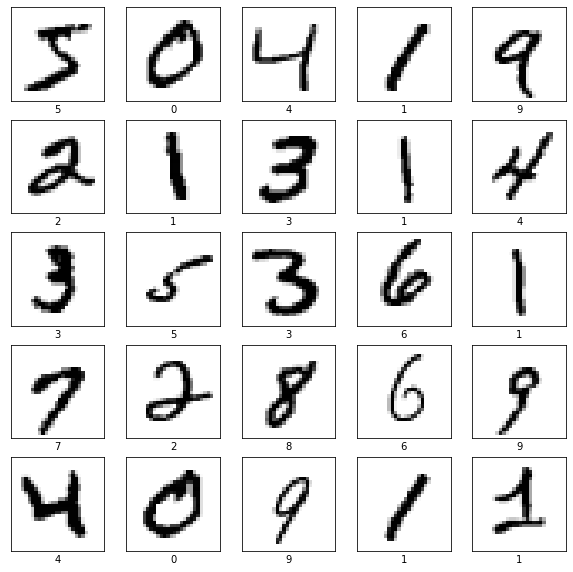

In [58]:
plt.figure(figsize=(10,10))  #Display first 25 images and its names from the training set

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train_full[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[y_train_full[i]])
plt.show()




In [59]:
base_model = tf.keras.applications.VGG16(weights = 'imagenet', include_top= False, input_shape = (32,32,3))  #Use VGG16 with keras applications
for layer in base_model.layers:
    layer.trainable = False

In [60]:
x = layers.Flatten()(base_model.output) 
x = layers.Dense(4096 , activation = "relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(4096, activation = "relu")(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(10, activation = "softmax")(x)
#fully connected layers are added to the base model

In [61]:
head_model = Model(inputs = base_model.input, outputs = predictions)
head_model.compile(optimizer='adam', loss= losses.sparse_categorical_crossentropy, metrics=['accuracy'])
#Compile the Model

In [62]:
head_model.summary() #Model Summary

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [63]:
X_train.shape

TensorShape([58000, 32, 32, 3])

In [64]:
#X_train=X_train.reshape(55000,32,32,1)

In [65]:
history = head_model.fit(X_train, y_train, epochs = 80, validation_data= (x_val, y_val)) # Train the model with epochs = 30

Epoch 1/80
1813/1813 [==============================] - 26s 14ms/step - loss: 0.4047 - accuracy: 0.8656 - val_loss: 0.1235 - val_accuracy: 0.9570
Epoch 2/80
1813/1813 [==============================] - 25s 14ms/step - loss: 0.2776 - accuracy: 0.9094 - val_loss: 0.1431 - val_accuracy: 0.9570
Epoch 3/80
1813/1813 [==============================] - 25s 14ms/step - loss: 0.2456 - accuracy: 0.9213 - val_loss: 0.1092 - val_accuracy: 0.9690
Epoch 4/80
1813/1813 [==============================] - 25s 14ms/step - loss: 0.2325 - accuracy: 0.9272 - val_loss: 0.0898 - val_accuracy: 0.9745
Epoch 5/80
1813/1813 [==============================] - 25s 14ms/step - loss: 0.2254 - accuracy: 0.9296 - val_loss: 0.0938 - val_accuracy: 0.9710
Epoch 6/80
1813/1813 [==============================] - 25s 14ms/step - loss: 0.2118 - accuracy: 0.9350 - val_loss: 0.0841 - val_accuracy: 0.9775
Epoch 7/80
1813/1813 [==============================] - 25s 14ms/step - loss: 0.2032 - accuracy: 0.9372 - val_loss: 0.1093 -

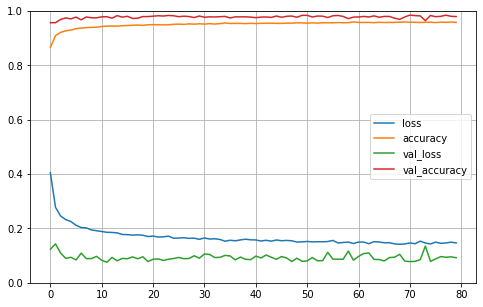

In [72]:
import pandas as pd #Plot learning curve
pd.DataFrame(history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #set the vertical range to [0-1]
plt.show()

In [67]:
y_test.shape

(10000,)

In [73]:
test_loss, test_acc = head_model.evaluate(X_test, y_test, verbose = 2) #Evaluate the test accuracy
print("\nTest accuracy: ", test_acc)

313/313 - 3s - loss: 0.1074 - accuracy: 0.9683 - 3s/epoch - 9ms/step

Test accuracy:  0.9682999849319458


In [69]:
probability_model = tf.keras.Sequential([head_model, tf.keras.layers.Softmax()]) #Make prediction on the test dataset
predictions = probability_model.predict(X_test)

for i in range(25):
  predictions[i]

  print(np.argmax(predictions[i]))

313/313 [==============================] - 3s 8ms/step
7
2
1
0
4
1
4
9
5
9
0
6
9
0
1
5
9
7
2
4
9
6
6
5
4


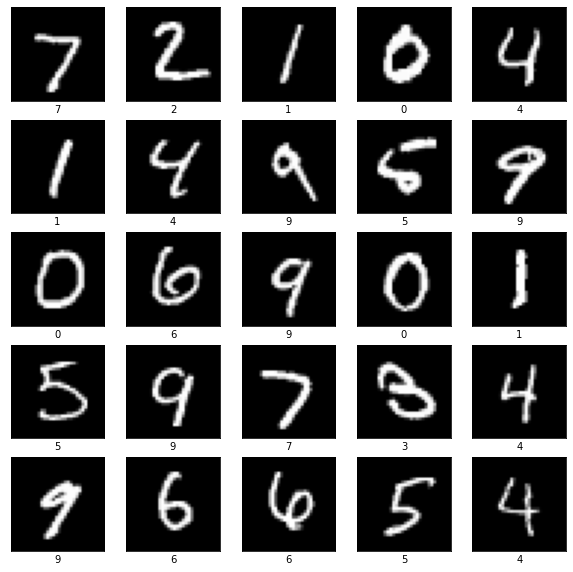

In [70]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_test[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[y_test[i]])
plt.show()